In [0]:
#Load Everything and ensure that during changes items are reloaded
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#import fastai.. cheat and load everything!
import fastai
from fastai import *
#import fastai more specific
from fastai.vision import *
from fastai.metrics import *
import re
import scipy.ndimage
fastai.__version__

'1.0.54'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd ./gdrive/My \Drive/PCD

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/PCD


In [0]:
#path to the data
path = Path('output'); path.ls()

[PosixPath('output/valid'),
 PosixPath('output/models'),
 PosixPath('output/train')]

In [0]:
# We are using batchsize of 8
bs = 8
# This is what we want to flip and move around; we want to do just basic stuff at first
tfms = get_transforms()
# pulls and formats the data by looking for the
# path= where it is stored
# ds_tfms= the transforms we want of the images
# size= how big the images should be
# bs= batchsize that we can fit with the GPU Ram; Mine is 64 for 8gb
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, bs=bs).normalize(imagenet_stats)
# lists out the classes
data.classes

['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Cu', 'Ns', 'Sc', 'St']

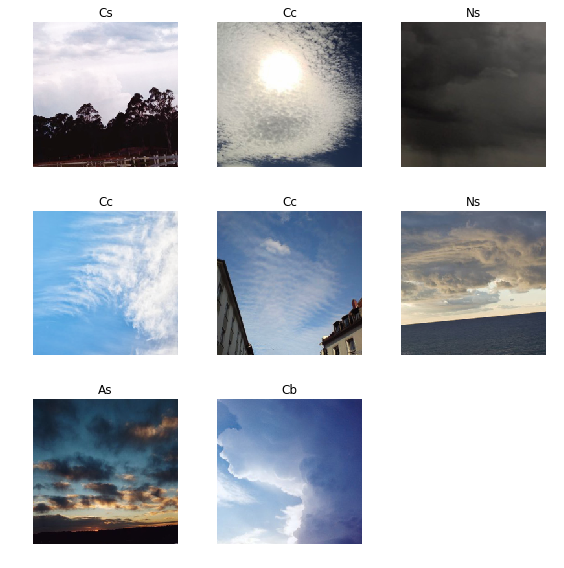

In [0]:
data.show_batch(rows=4, figsize=(8,8))

In [0]:
# learn will be a convultional neural network (cnn) that takes in several items
# data = our images that have been setup
# architecture = is the model we are choosing. In this case Resnet34
# metrics = is how we are going to gauge success
learn = cnn_learner(data, models.densenet201, metrics=accuracy, callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/checkpoints/densenet201-c1103571.pth
100%|██████████| 81131730/81131730 [00:02<00:00, 27990432.80it/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.112768,1.649808,0.450317,05:14
1,1.890084,1.353840,0.556025,01:35
2,1.777809,1.267382,0.598309,01:35
3,1.704506,1.226866,0.598309,01:35
4,1.642535,1.175331,0.604651,01:35
5,1.659259,1.116202,0.621565,01:35
6,1.565774,1.059918,0.661734,01:35
7,1.572382,0.942608,0.689218,01:35
8,1.397395,1.209510,0.684989,01:35
9,1.449200,0.836926,0.735729,01:35


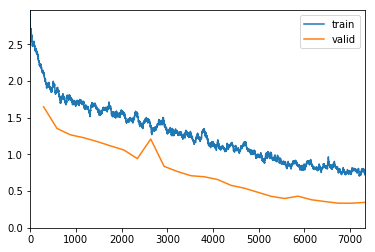

In [0]:
learn.fit_one_cycle(25)

In [0]:
# we save our results weights to use later
learn.save('stage-1-d201')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


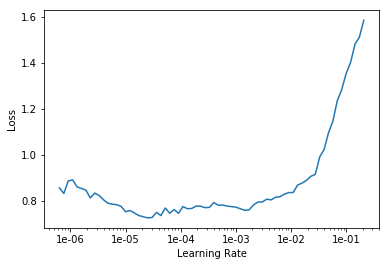

In [0]:
learn.lr_find()
learn.recorder.plot()